## COLORECTAL CANCER DETECTION

#### SOFT COMPUTING TECHNIQUES

> IMPORT REQUIRED LIBRARIES

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import time as t
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

> import dataset

In [5]:
data = pd.read_csv("data.csv")

In [6]:
data.head(5)

,71.8,6.22,0.261,4.49,327,0.192,0.00096,7.17,0.00211,3.69E-07,2.68E-11,2.04E-11,4.19E-22,1.19E-14,2.28E-22,1
0,71.2,6.48,-0.60700,4.30,308.0,0.206,0.000808,7.33,0.00209,3.170000e-07,2.400000e-11,2.470000e-11,1.850000e-22,6.300000e-15,5.740000e-22,1
1,80.1,20.00,-0.61000,2.26,181.0,0.247,0.001060,7.23,0.00259,7.720000e-08,8.200000e-11,1.460000e-10,-1.510000e-20,-3.330000e-14,4.950000e-21,1
2,52.7,5.38,0.05730,2.41,175.0,0.259,0.001920,6.58,0.00264,3.490000e-09,1.520000e-10,6.900000e-11,-6.410000e-21,-2.810000e-16,-2.970000e-21,1
3,57.1,6.00,0.00263,2.47,207.0,0.245,0.001510,6.79,0.00247,2.650000e-08,1.530000e-10,3.670000e-11,-2.720000e-21,-2.020000e-15,-3.840000e-22,1
4,65.9,6.40,0.21300,2.69,283.0,0.220,0.001240,6.93,0.00211,3.750000e-08,7.430000e-11,1.830000e-11,-6.430000e-22,2.460000e-16,-2.010000e-22,1


In [6]:
from sklearn import datasets
%matplotlib notebook

In [7]:
data_new=data.as_matrix()

C:\Users\rishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


> VISUALIZE THE DATA

<IPython.core.display.Javascript object>


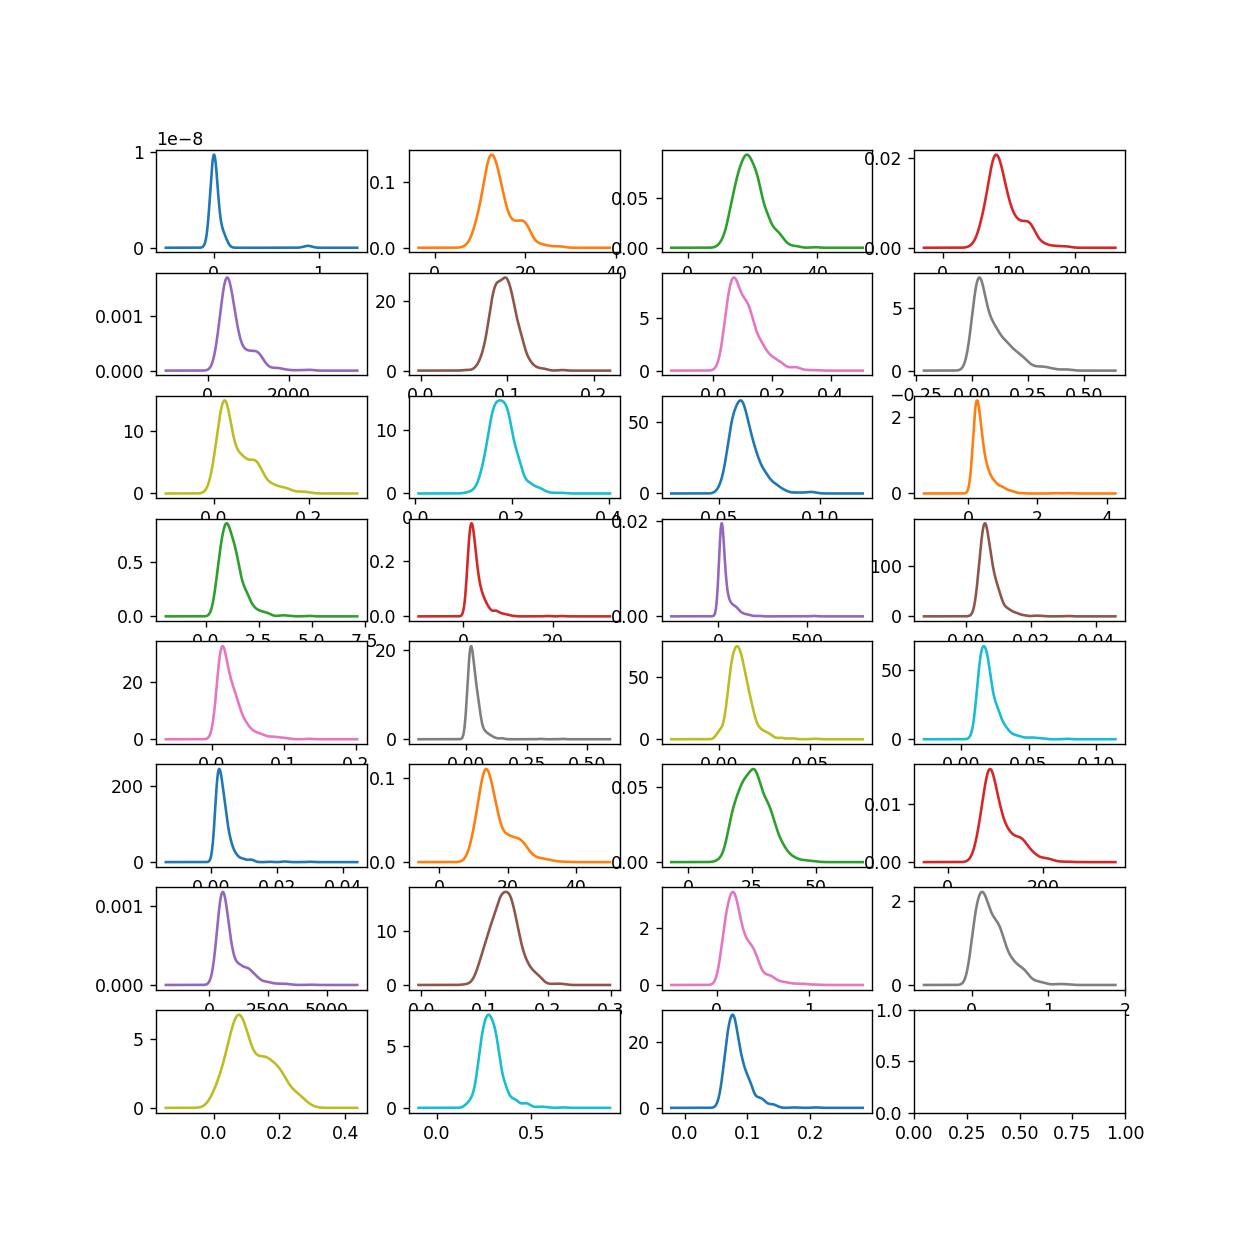

C:\Users\rishi\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1450: RuntimeWarning: All-NaN slice encountered
  sample_range = np.nanmax(y) - np.nanmin(y)
C:\Users\rishi\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1451: RuntimeWarning: All-NaN slice encountered
  ind = np.linspace(np.nanmin(y) - 0.5 * sample_range,
C:\Users\rishi\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1452: RuntimeWarning: All-NaN slice encountered
  np.nanmax(y) + 0.5 * sample_range, 1000)


In [8]:
try:
    data.plot(kind='density',subplots=True,layout=(8,4),sharex=False,figsize=(10,10))
except:
    pass

In [9]:
dataset = []
labels = []
for datas in data_new:
    labels.append(datas[1])
    datas=datas[2:len(datas)-1]
    dataset.append(datas)

> PREPROCESSING

In [10]:
data_new=np.array(dataset)
Min_Max = preprocessing.MinMaxScaler()
Data_Normalized=Min_Max.fit_transform(data_new)

>VISUALIZATION OF DATA

In [11]:
PCA_s = PCA(n_components = 2)
Arrays = PCA_s.fit_transform(Data_Normalized)
print(Arrays)

[[ 1.38702121  0.42689533]
 [ 0.46230825 -0.55694674]
 [ 0.95462147 -0.10970115]
 ...
 [ 0.22631131 -0.28794577]
 [ 1.67783369  0.33594595]
 [-0.90506804 -0.10410875]]


>GRAPH

In [12]:
Shapes = Data_Normalized.shape
print(Shapes)

(569, 30)


> USING PCA

<IPython.core.display.Javascript object>


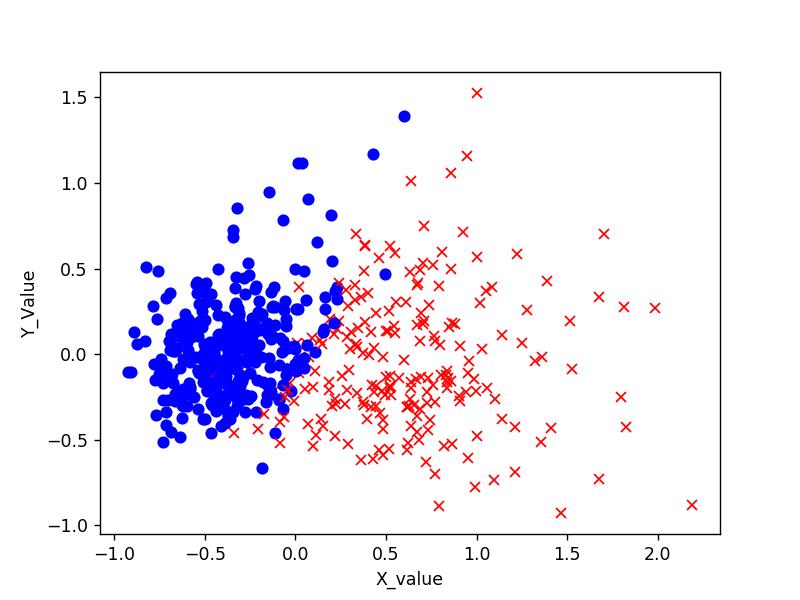

In [13]:
%matplotlib notebook
for j in range(569):
    if(labels[j] == 'M'):
        plt.plot(Arrays[j][0],Arrays[j][1],marker='x',color='r')
    else:
        plt.plot(Arrays[j][0],Arrays[j][1],marker='o',color='b')
        
plt.xlabel('X_value')
plt.ylabel('Y_Value')
plt.show()

> USING TSNE

In [14]:
tsne = TSNE(n_components=2)
Arrays=tsne.fit_transform(Data_Normalized)
print(Arrays)

[[-28.442013  -24.157328 ]
 [-20.253931   -9.809047 ]
 [-22.300022  -21.858845 ]
 ...
 [-14.837399   -2.8319552]
 [-27.08622   -25.65047  ]
 [ 20.147972   23.939074 ]]


> GRAPH

<IPython.core.display.Javascript object>


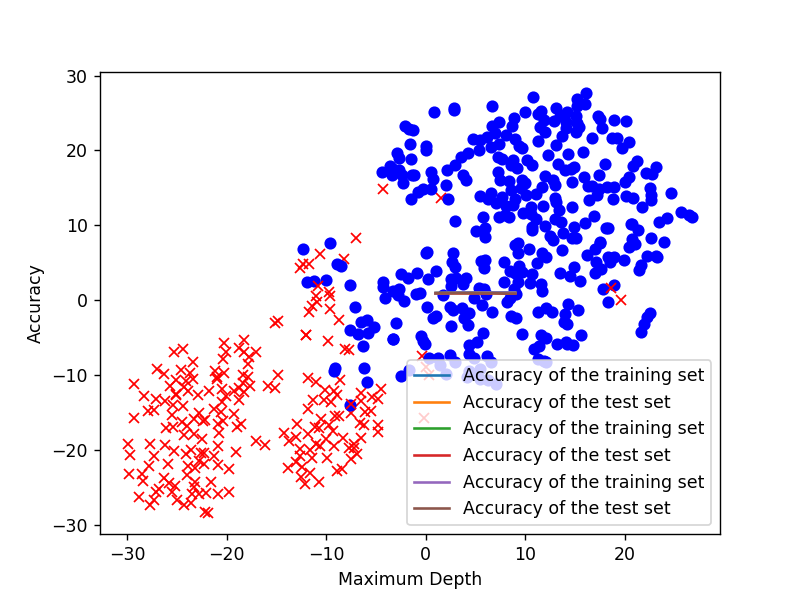

In [16]:
%matplotlib notebook
Shapes = Data_Normalized.shape
for j in range(Shapes[0]):
    if(labels[j] == 'M'):
        plt.plot(Arrays[j][0],Arrays[j][1],marker='x',color='r')
    else:
        plt.plot(Arrays[j][0],Arrays[j][1],marker='o',color='b')
        
plt.xlabel('X value')
plt.ylabel('Y value')

plt.show()

> CONVERSION OF DATA

In [17]:
benign = []
malignant = []
for j in range(Data_Normalized.shape[0]):
    if(labels[j] == 'M'):
        benign.append(Data_Normalized[j])
    else:
        malignant.append(Data_Normalized[j])
        
print("Number of Patients with no Colorectal Cancer=",len(benign))
print("Number of Patients with Colorectal Cancer   =",len(malignant))

Number of Patients with no Colorectal Cancer= 212
Number of Patients with Colorectal Cancer   = 357


> Shapes

In [18]:
Splits = 150
Training_Daatas = np.array(benign[:Splits]+malignant[:Splits])
Testing_Daatas = np.array(benign[Splits:]+malignant[Splits:])

Training_Laabels = np.array([1 for i in range(Splits)]+[0 for i in range(Splits)])
Testing_Laabels = np.array([1 for i in range(Splits,len(benign))]+[0 for i in range(Splits,len(malignant))])

print("Number of Rows and Column")
print("Training Data   =",Training_Daatas.shape)
print("Testing Data    =",Testing_Daatas.shape)
print("For Training Labels =",Training_Laabels.shape)
print("For Testing Labels  =",Testing_Laabels.shape)

Number of Rows and Column
Training Data   = (300, 30)
Testing Data    = (269, 30)
For Training Labels = (300,)
For Testing Labels  = (269,)


> Values in Training And Testing Data

In [19]:

print("Training Data   =",Training_Daatas)
print("")
print("Testing Data    =",Testing_Daatas)
print("")
print("Training Labels =",Training_Laabels)
print("")
print("Testing Labels  =",Testing_Laabels)

Training Data   = [[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.28250272 0.21339195 0.27192316 ... 0.3628866  0.35777646 0.26761118]
 [0.23044157 0.26208996 0.21940433 ... 0.31408935 0.30277942 0.09858323]
 [0.27161721 0.1376395  0.26252505 ... 0.21797251 0.1584861  0.093008  ]]

Testing Data    = [[6.32258981e-01 3.99053094e-01 6.36514408e-01 ... 9.22680412e-01
  7.87108220e-01 3.10638856e-01]
 [4.39632732e-01 3.71998647e-01 4.36113607e-01 ... 5.43986254e-01
  3.03173664e-01 1.76833268e-01]
 [4.39159449e-01 4.11565776e-01 4.40259830e-01 ... 3.59793814e-01
  2.30829884e-01 1.60632297e-01]
 ...
 [3.34563870e-01 5.89786946e-01 3.28864626e-01 ... 3.60137457e-01
  1.35028583e-01 1.84769776e-01]
 [1.99678167e-01 6.64863037e-01 1.85750812e-01 ... 0.00000000e+00
  1.97122019e-04 2.63019808e-02]
 [3.68687586e-02 5.

>SVM

In [22]:
Kernel = ['linear','poly','rbf','sigmoid']
for kval in Kernel:
    Class=SVC(kernel=kval)
    at=t.time()
    print("")
    print('Kernel we used is :',kval)
    Class.fit(Training_Daatas,Training_Laabels)
    print('Training Accuracy'+str(f1_score(Training_Laabels,Class.predict(Training_Daatas))))
    print('Testing Accuracy'+str(f1_score(Testing_Laabels,Class.predict(Testing_Daatas))))
    print('Total time taken '+str(t.time()-at))


Kernel we used is : linear
Training Accuracy0.9696969696969697
Testing Accuracy0.9465648854961832
Total time taken 0.004986763000488281

Kernel we used is : poly
Training Accuracy0.15950920245398773
Testing Accuracy0.2028985507246377
Total time taken 0.010970592498779297

Kernel we used is : rbf
Training Accuracy0.9411764705882353
Testing Accuracy0.9508196721311476
Total time taken 0.009003877639770508

Kernel we used is : sigmoid
Training Accuracy0.9192982456140351
Testing Accuracy0.9586776859504132
Total time taken 0.007979154586791992


C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


>Using Guassian Naive Bayes

In [24]:
Class = GaussianNB()
at=t.time()
Class.fit(Training_Daatas,Training_Laabels)
print("Time Taken for Training =",(t.time()-at))
print("Accuracy of Training    =",(f1_score(Training_Laabels,clf1.predict(Training_Daatas))))
print("Accuracy of Testing     =",(f1_score(Testing_Laabels,clf1.predict(Testing_Daatas))))

Time Taken for Training = 0.0018162727355957031
Accuracy of Training    = 0.9696969696969697
Accuracy of Testing     = 0.9465648854961832


> Decision Tree

<IPython.core.display.Javascript object>


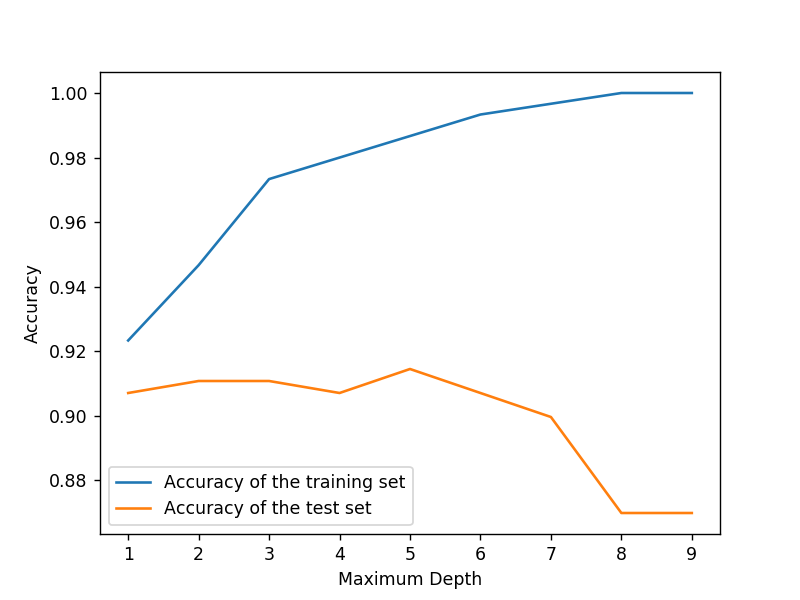

In [30]:
%matplotlib notebook

Traing_Accuracy = []
Testing_Accuracy = []

maximum_dep = range(1,10)
Neighbors = range(1,10) 

for maxd in maximum_dep:
    tree = DecisionTreeClassifier(max_depth=maxd,random_state=0)
    tree.fit(Training_Daatas,Training_Laabels)
    Traing_Accuracy.append(tree.score(Training_Daatas,Training_Laabels))
    Testing_Accuracy.append(tree.score(Testing_Daatas,Testing_Laabels))
 
plt.plot(maximum_dep,Traing_Accuracy, label='Accuracy of the training set')
plt.plot(Neighbors,Testing_Accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Maximum Depth')
plt.legend()

> Using KNeighbors

In [32]:
Class = KNeighborsClassifier()
at=t.time()
Class.fit(Training_Daatas,Training_Laabels)
print("Time Taken for Training =",(t.time()-at))
print("Accuracy of Training    =",(f1_score(Training_Laabels,clf1.predict(Training_Daatas))))
print("Accuracy of Testing     =",(f1_score(Testing_Laabels,clf1.predict(Testing_Daatas))))

Time Taken for Training = 0.0
Accuracy of Training    = 0.9696969696969697
Accuracy of Testing     = 0.9465648854961832


>Decision Tree